In [2]:
import sqlite3
import math
import pandas as pd
import scipy.io
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from sqlite3 import Error
from skimage.color import rgb2hsv
from sklearn import manifold
from scipy.spatial.distance import pdist, squareform
from pathlib import Path
%matplotlib inline

In [3]:
graph_types = [
    'bk_obj_color',
    'bk_obj_color_shape',
    'bk_part_obj_color',
    'bk_part_obj_color_shape',
    'cds_obj_color',
    'cds_obj_color_shape',
    'cds_part_obj_color',
    'cds_part_obj_color_shape',
]

modelnames = [
    'inception_imageneta_bias',
    'squeezenet_imageneta_bias',
    'inception_utensil_color_bias',
    'inception_utensil_shape_bias',
    'inception_utensil_both_bias',
    'squeezenet_utensil_both_bias',
    'squeezenet_utensil_color_bias',
    'squeezenet_utensil_shape_bias'
    
]

imagenet_classes = [
    'ants',
    'mantis',
    'bees'
]
utensil_classes = [
    'TEA_SPOON',
    'FISH_SLICE',
    'DINNER_CUTLERY'
]

In [6]:
def condensed_to_square_index(ti, c):
    return ti[0][c], ti[1][c]

def get_pairs(distances,ind):
    r = []
    n = np.ceil(np.sqrt(2* len(distances)))
    ti = np.triu_indices(n, 1)

    for i in ind:
        pair = condensed_to_square_index(ti, i)
        r.append(pair)
    return r

In [7]:
annotation_path = './db.sqlite3'
conn = sqlite3.connect(annotation_path)

In [28]:
data_transforms = transforms.Compose([
       transforms.Resize((224,224)),
       transforms.ToTensor(),
       transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
   ])

In [22]:
def jaccard_similarity(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(set(list1)) + len(set(list2))) - intersection
    return round(float(intersection) / union,2)

In [33]:
np.random.seed(120)

inception_imageneta_bias_ants.csv
inception_imageneta_bias_mantis.csv
inception_imageneta_bias_bees.csv
squeezenet_imageneta_bias_ants.csv
squeezenet_imageneta_bias_mantis.csv
squeezenet_imageneta_bias_bees.csv


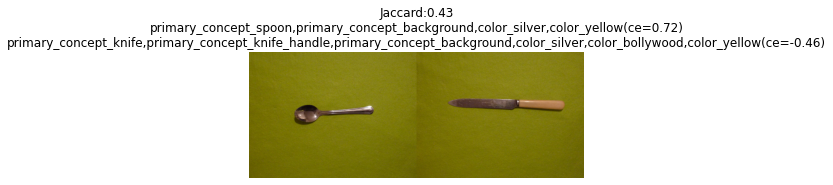

bk_part_obj_color inception_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [778, 908]
jaccard 0.43
sum1 0.7207173030179513
sum2 -0.4570484387582142
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_knife' 'primary_concept_knife_handle'
 'primary_concept_background' 'color_silver' 'color_bollywood'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_TEA_SPOON.csv


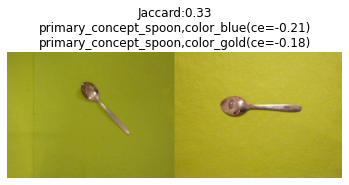

bk_part_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [688, 878]
jaccard 0.33
sum1 -0.20699678084534479
sum2 -0.1843087317703778
------------------------------------
['primary_concept_spoon' 'color_blue']
['primary_concept_spoon' 'color_gold']
------------------------------------


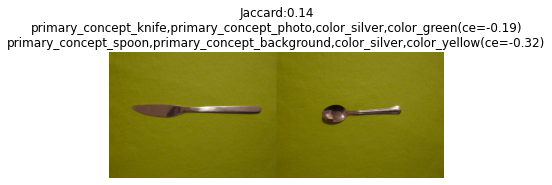

bk_part_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [734, 778]
jaccard 0.14
sum1 -0.18564822862114688
sum2 -0.3224311565048654
------------------------------------
['primary_concept_knife' 'primary_concept_photo' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_FISH_SLICE.csv


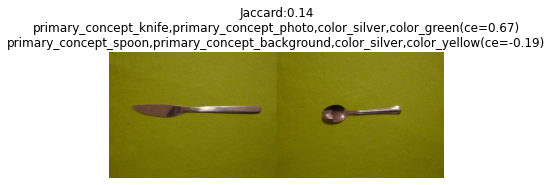

bk_part_obj_color inception_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [734, 778]
jaccard 0.14
sum1 0.674801926804836
sum2 -0.1890549504567142
------------------------------------
['primary_concept_knife' 'primary_concept_photo' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_DINNER_CUTLERY.csv


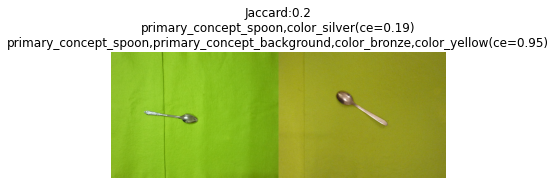

bk_part_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [303, 368]
jaccard 0.2
sum1 0.19084771328523312
sum2 0.9547903836282885
------------------------------------
['primary_concept_spoon' 'color_silver']
['primary_concept_spoon' 'primary_concept_background' 'color_bronze'
 'color_yellow']
------------------------------------


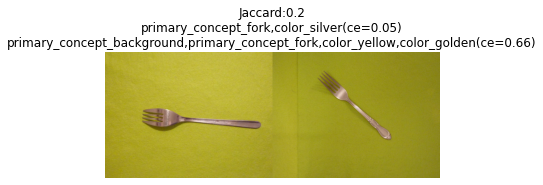

bk_part_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [269, 296]
jaccard 0.2
sum1 0.054868550163107516
sum2 0.6557910971542895
------------------------------------
['primary_concept_fork' 'color_silver']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------


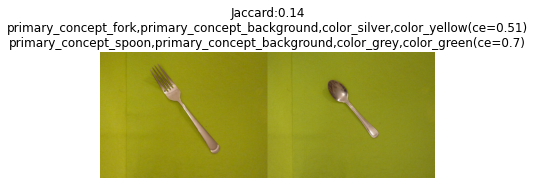

bk_part_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [172, 276]
jaccard 0.14
sum1 0.5125973004876226
sum2 0.704480319145443
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_spoon' 'primary_concept_background' 'color_grey'
 'color_green']
------------------------------------
inception_utensil_color_bias_TEA_SPOON.csv
inception_utensil_color_bias_FISH_SLICE.csv


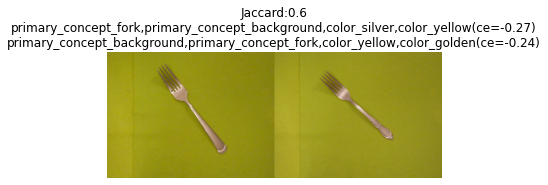

bk_part_obj_color inception_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [172, 296]
jaccard 0.6
sum1 -0.27271561860810456
sum2 -0.23644487860810406
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------
inception_utensil_color_bias_DINNER_CUTLERY.csv


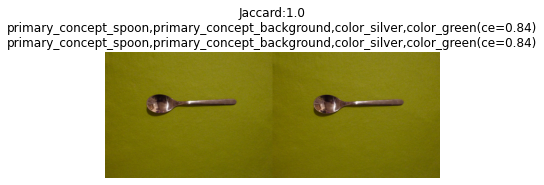

bk_part_obj_color squeezenet_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [1835, 2038]
jaccard 1.0
sum1 0.8386432483050882
sum2 0.8386432483050882
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------
squeezenet_utensil_both_bias_TEA_SPOON.csv


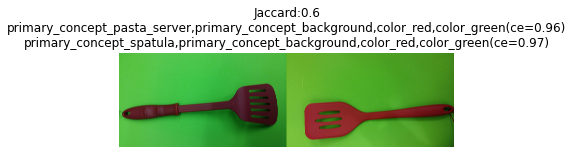

bk_part_obj_color squeezenet_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [2060, 2061]
jaccard 0.6
sum1 0.9582685339714873
sum2 0.9656212865037465
------------------------------------
['primary_concept_pasta_server' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
------------------------------------


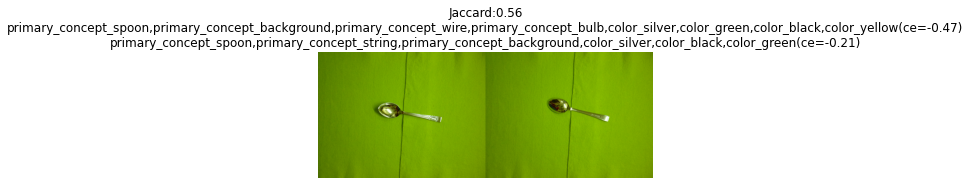

bk_part_obj_color squeezenet_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [1913, 1930]
jaccard 0.56
sum1 -0.4705445131664673
sum2 -0.20900556522707014
------------------------------------
['primary_concept_spoon' 'primary_concept_background'
 'primary_concept_wire' 'primary_concept_bulb' 'color_silver'
 'color_green' 'color_black' 'color_yellow']
['primary_concept_spoon' 'primary_concept_string'
 'primary_concept_background' 'color_silver' 'color_black' 'color_green']
------------------------------------
squeezenet_utensil_both_bias_FISH_SLICE.csv


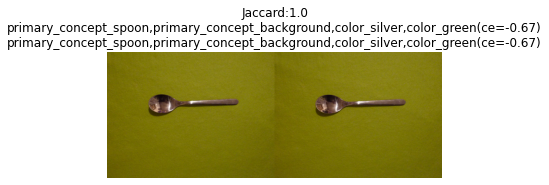

bk_part_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1835, 2038]
jaccard 1.0
sum1 -0.6679151181678546
sum2 -0.6679151181678546
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------


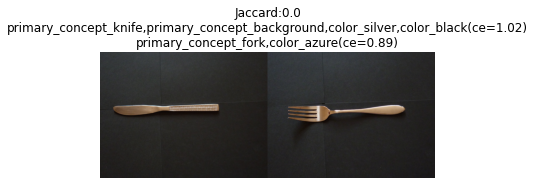

bk_part_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1842, 1972]
jaccard 0.0
sum1 1.0231603367774118
sum2 0.8882406939016931
------------------------------------
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_black']
['primary_concept_fork' 'color_azure']
------------------------------------


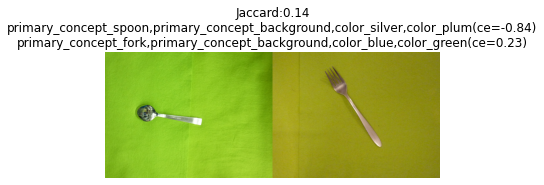

bk_part_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2005, 2029]
jaccard 0.14
sum1 -0.8405694102511878
sum2 0.22873701628214627
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
['primary_concept_fork' 'primary_concept_background' 'color_blue'
 'color_green']
------------------------------------
squeezenet_utensil_both_bias_DINNER_CUTLERY.csv


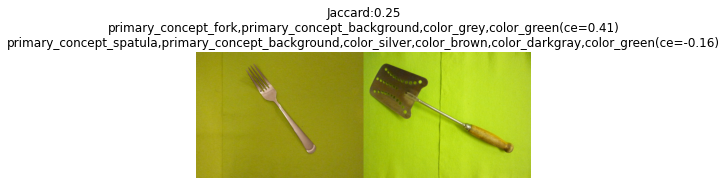

bk_part_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2158, 2195]
jaccard 0.25
sum1 0.413117508703513
sum2 -0.16278570911599388
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_grey'
 'color_green']
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_brown' 'color_darkgray' 'color_green']
------------------------------------


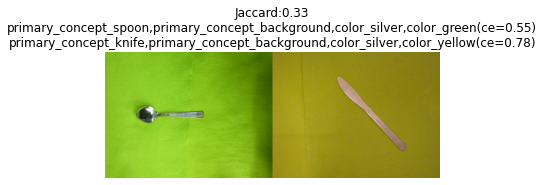

bk_part_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2169, 2323]
jaccard 0.33
sum1 0.5458512595067659
sum2 0.7755512147810996
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
squeezenet_utensil_color_bias_TEA_SPOON.csv
squeezenet_utensil_color_bias_FISH_SLICE.csv


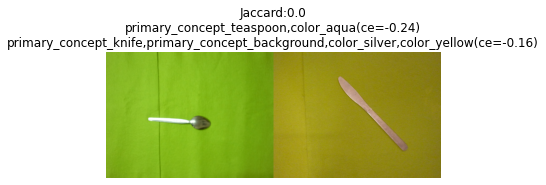

bk_part_obj_color squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2287, 2323]
jaccard 0.0
sum1 -0.2424731228807743
sum2 -0.16429761477037566
------------------------------------
['primary_concept_teaspoon' 'color_aqua']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
inception_imageneta_bias_ants.csv
inception_imageneta_bias_mantis.csv
inception_imageneta_bias_bees.csv
squeezenet_imageneta_bias_ants.csv
squeezenet_imageneta_bias_mantis.csv
squeezenet_imageneta_bias_bees.csv


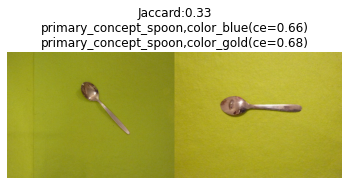

bk_obj_color inception_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [688, 878]
jaccard 0.33
sum1 0.6609634755090844
sum2 0.6808758355692855
------------------------------------
['primary_concept_spoon' 'color_blue']
['primary_concept_spoon' 'color_gold']
------------------------------------
inception_utensil_both_bias_TEA_SPOON.csv


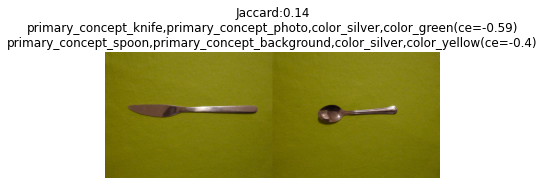

bk_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [734, 778]
jaccard 0.14
sum1 -0.5915302706918014
sum2 -0.4028872068776495
------------------------------------
['primary_concept_knife' 'primary_concept_photo' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------


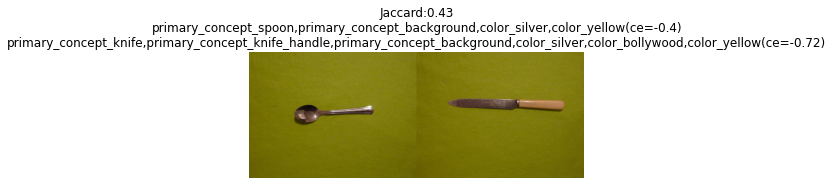

bk_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [778, 908]
jaccard 0.43
sum1 -0.4028872068776495
sum2 -0.7223177456465525
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_knife' 'primary_concept_knife_handle'
 'primary_concept_background' 'color_silver' 'color_bollywood'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_FISH_SLICE.csv


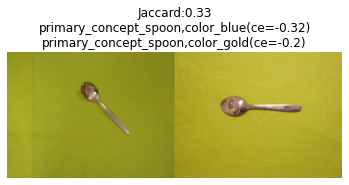

bk_obj_color inception_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [688, 878]
jaccard 0.33
sum1 -0.316138521478975
sum2 -0.20222328531718348
------------------------------------
['primary_concept_spoon' 'color_blue']
['primary_concept_spoon' 'color_gold']
------------------------------------
inception_utensil_both_bias_DINNER_CUTLERY.csv


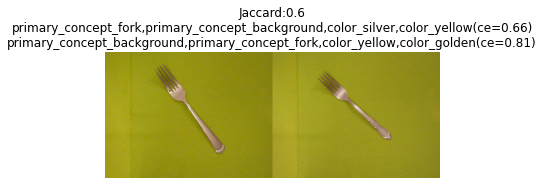

bk_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [172, 296]
jaccard 0.6
sum1 0.6555602877148631
sum2 0.808468455214862
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------
inception_utensil_color_bias_TEA_SPOON.csv


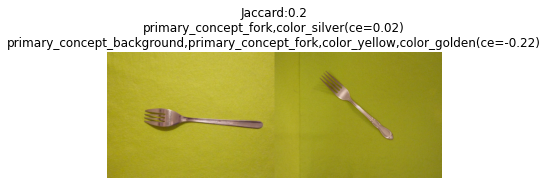

bk_obj_color inception_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [269, 296]
jaccard 0.2
sum1 0.0152552819902693
sum2 -0.21515958578773609
------------------------------------
['primary_concept_fork' 'color_silver']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------


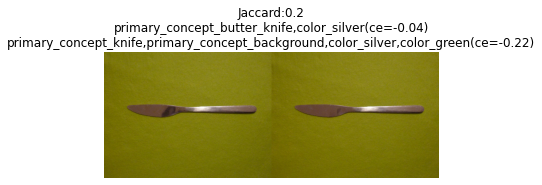

bk_obj_color inception_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [140, 237]
jaccard 0.2
sum1 -0.0364954085703364
sum2 -0.2223911059937971
------------------------------------
['primary_concept_butter_knife' 'color_silver']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------


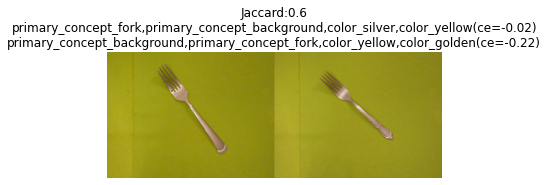

bk_obj_color inception_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [172, 296]
jaccard 0.6
sum1 -0.015676358287736496
sum2 -0.21515958578773609
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------
inception_utensil_color_bias_FISH_SLICE.csv


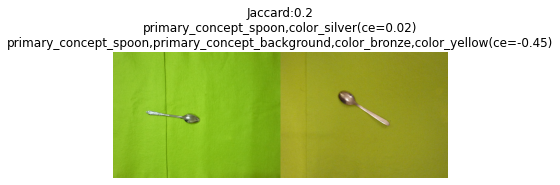

bk_obj_color inception_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [303, 368]
jaccard 0.2
sum1 0.018657339240143705
sum2 -0.44897756997354843
------------------------------------
['primary_concept_spoon' 'color_silver']
['primary_concept_spoon' 'primary_concept_background' 'color_bronze'
 'color_yellow']
------------------------------------
inception_utensil_color_bias_DINNER_CUTLERY.csv


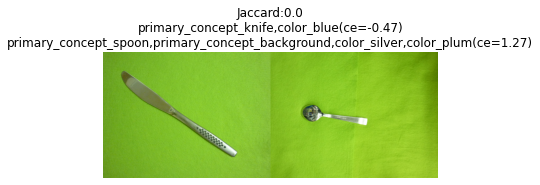

bk_obj_color squeezenet_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [1989, 2005]
jaccard 0.0
sum1 -0.4723394239489442
sum2 1.2671456040301312
------------------------------------
['primary_concept_knife' 'color_blue']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
------------------------------------


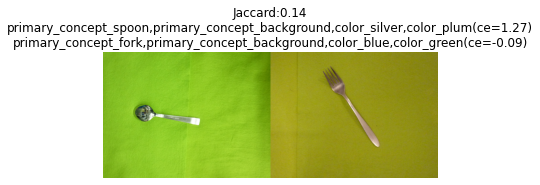

bk_obj_color squeezenet_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [2005, 2029]
jaccard 0.14
sum1 1.2671456040301312
sum2 -0.09321871661115094
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
['primary_concept_fork' 'primary_concept_background' 'color_blue'
 'color_green']
------------------------------------
squeezenet_utensil_both_bias_TEA_SPOON.csv
squeezenet_utensil_both_bias_FISH_SLICE.csv


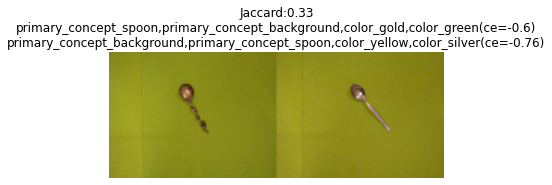

bk_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1933, 1974]
jaccard 0.33
sum1 -0.6016054371208606
sum2 -0.7568677051015507
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_background' 'primary_concept_spoon' 'color_yellow'
 'color_silver']
------------------------------------
squeezenet_utensil_both_bias_DINNER_CUTLERY.csv


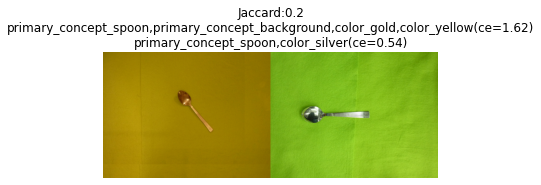

bk_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2124, 2309]
jaccard 0.2
sum1 1.6201827909529762
sum2 0.5443997375269294
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_gold'
 'color_yellow']
['primary_concept_spoon' 'color_silver']
------------------------------------
squeezenet_utensil_color_bias_TEA_SPOON.csv


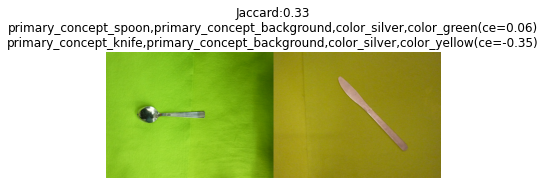

bk_obj_color squeezenet_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [2169, 2323]
jaccard 0.33
sum1 0.0630061029503397
sum2 -0.350291653948402
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
squeezenet_utensil_color_bias_FISH_SLICE.csv


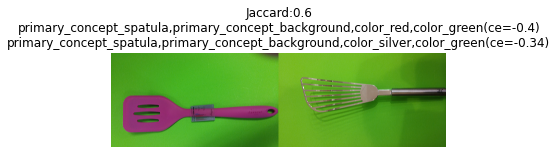

bk_obj_color squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2087, 2114]
jaccard 0.6
sum1 -0.4003638063103542
sum2 -0.3391692434203747
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------
squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
inception_imageneta_bias_ants.csv
inception_imageneta_bias_mantis.csv
inception_imageneta_bias_bees.csv
squeezenet_imageneta_bias_ants.csv
squeezenet_imageneta_bias_mantis.csv
squeezenet_imageneta_bias_bees.csv


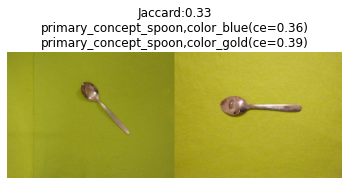

cds_part_obj_color inception_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [688, 878]
jaccard 0.33
sum1 0.35942227057578957
sum2 0.3854653931248183
------------------------------------
['primary_concept_spoon' 'color_blue']
['primary_concept_spoon' 'color_gold']
------------------------------------
inception_utensil_both_bias_TEA_SPOON.csv


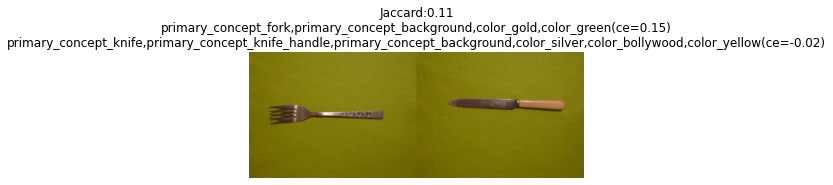

cds_part_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [736, 908]
jaccard 0.11
sum1 0.15028565906458358
sum2 -0.02397245377606551
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_knife' 'primary_concept_knife_handle'
 'primary_concept_background' 'color_silver' 'color_bollywood'
 'color_yellow']
------------------------------------


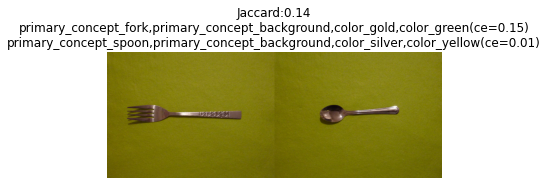

cds_part_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [736, 778]
jaccard 0.14
sum1 0.15028565906458358
sum2 0.007532788524544892
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_FISH_SLICE.csv
inception_utensil_both_bias_DINNER_CUTLERY.csv
inception_utensil_color_bias_TEA_SPOON.csv
inception_utensil_color_bias_FISH_SLICE.csv


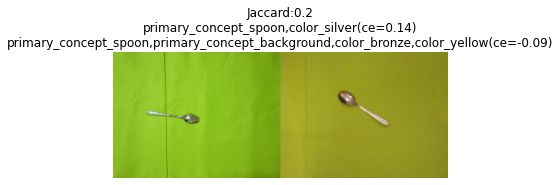

cds_part_obj_color inception_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [303, 368]
jaccard 0.2
sum1 0.1366331308851729
sum2 -0.0894415437106639
------------------------------------
['primary_concept_spoon' 'color_silver']
['primary_concept_spoon' 'primary_concept_background' 'color_bronze'
 'color_yellow']
------------------------------------


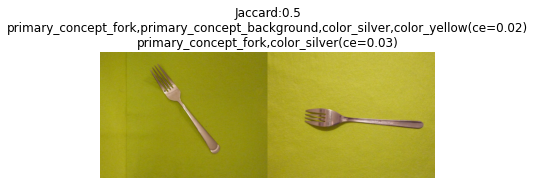

cds_part_obj_color inception_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [172, 269]
jaccard 0.5
sum1 0.023102255961183003
sum2 0.027114941496702294
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_fork' 'color_silver']
------------------------------------
inception_utensil_color_bias_DINNER_CUTLERY.csv
squeezenet_utensil_both_bias_TEA_SPOON.csv


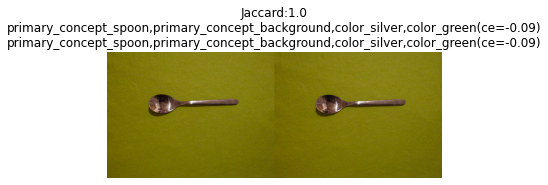

cds_part_obj_color squeezenet_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [1835, 2038]
jaccard 1.0
sum1 -0.09025953952951031
sum2 -0.09025953952951031
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------


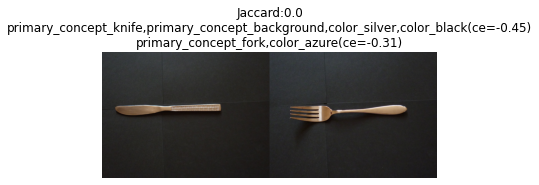

cds_part_obj_color squeezenet_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [1842, 1972]
jaccard 0.0
sum1 -0.4458980121008485
sum2 -0.3130571987478919
------------------------------------
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_black']
['primary_concept_fork' 'color_azure']
------------------------------------
squeezenet_utensil_both_bias_FISH_SLICE.csv


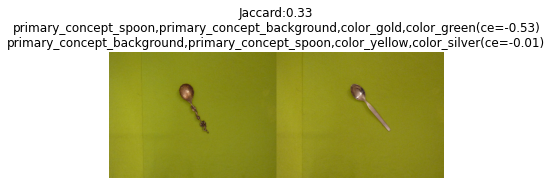

cds_part_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1933, 1974]
jaccard 0.33
sum1 -0.534540773366966
sum2 -0.0067750649559167875
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_background' 'primary_concept_spoon' 'color_yellow'
 'color_silver']
------------------------------------


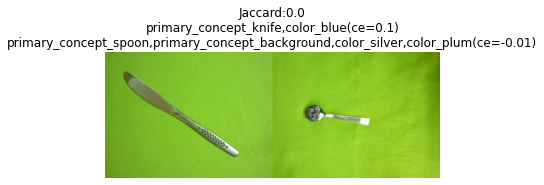

cds_part_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1989, 2005]
jaccard 0.0
sum1 0.09515865232522419
sum2 -0.006611886515989485
------------------------------------
['primary_concept_knife' 'color_blue']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
------------------------------------
squeezenet_utensil_both_bias_DINNER_CUTLERY.csv


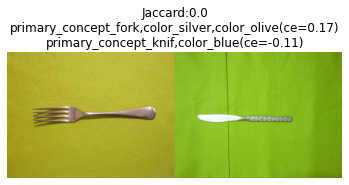

cds_part_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2086, 2090]
jaccard 0.0
sum1 0.1706047616632158
sum2 -0.1086245375092574
------------------------------------
['primary_concept_fork' 'color_silver' 'color_olive']
['primary_concept_knif' 'color_blue']
------------------------------------


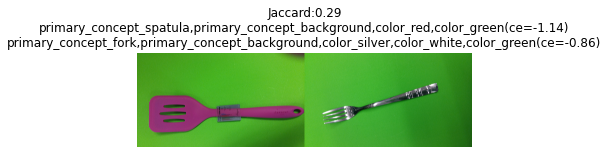

cds_part_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2087, 2321]
jaccard 0.29
sum1 -1.1447601615957623
sum2 -0.8584855069243152
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_white' 'color_green']
------------------------------------


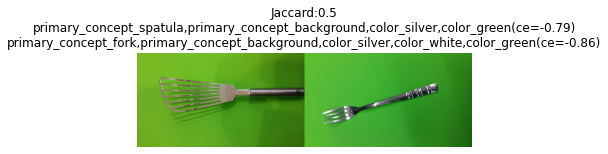

cds_part_obj_color squeezenet_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [2114, 2321]
jaccard 0.5
sum1 -0.7902369509337044
sum2 -0.8584855069243152
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_white' 'color_green']
------------------------------------
squeezenet_utensil_color_bias_TEA_SPOON.csv


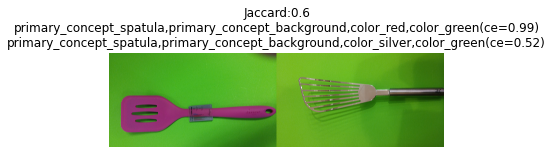

cds_part_obj_color squeezenet_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [2087, 2114]
jaccard 0.6
sum1 0.9941809306195868
sum2 0.5211828641456442
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------
squeezenet_utensil_color_bias_FISH_SLICE.csv


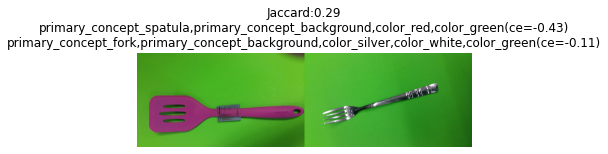

cds_part_obj_color squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2087, 2321]
jaccard 0.29
sum1 -0.42598966952436806
sum2 -0.110127722415535
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_white' 'color_green']
------------------------------------
squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
inception_imageneta_bias_ants.csv
inception_imageneta_bias_mantis.csv
inception_imageneta_bias_bees.csv
squeezenet_imageneta_bias_ants.csv
squeezenet_imageneta_bias_mantis.csv
squeezenet_imageneta_bias_bees.csv
inception_utensil_both_bias_TEA_SPOON.csv


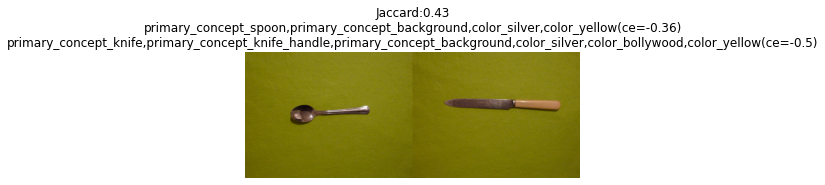

cds_obj_color inception_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [778, 908]
jaccard 0.43
sum1 -0.36277647635362364
sum2 -0.503674411684739
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
['primary_concept_knife' 'primary_concept_knife_handle'
 'primary_concept_background' 'color_silver' 'color_bollywood'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_FISH_SLICE.csv


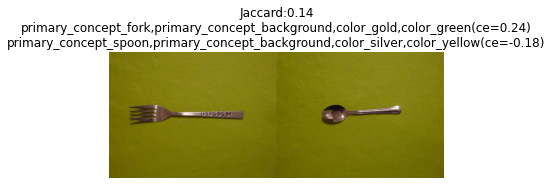

cds_obj_color inception_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [736, 778]
jaccard 0.14
sum1 0.24477098601143643
sum2 -0.1803343690562543
------------------------------------
['primary_concept_fork' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------


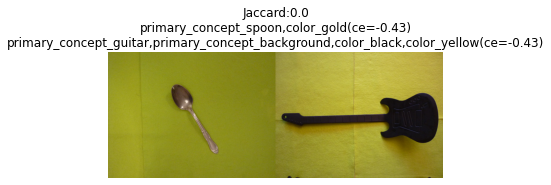

cds_obj_color inception_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [715, 907]
jaccard 0.0
sum1 -0.42541083469833063
sum2 -0.4335535102088537
------------------------------------
['primary_concept_spoon' 'color_gold']
['primary_concept_guitar' 'primary_concept_background' 'color_black'
 'color_yellow']
------------------------------------
inception_utensil_both_bias_DINNER_CUTLERY.csv


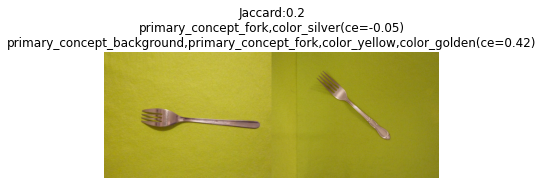

cds_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [269, 296]
jaccard 0.2
sum1 -0.04971128407884229
sum2 0.41860226726023875
------------------------------------
['primary_concept_fork' 'color_silver']
['primary_concept_background' 'primary_concept_fork' 'color_yellow'
 'color_golden']
------------------------------------


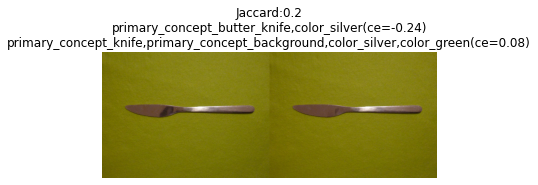

cds_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [140, 237]
jaccard 0.2
sum1 -0.24189273753058346
sum2 0.08102006424307462
------------------------------------
['primary_concept_butter_knife' 'color_silver']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------


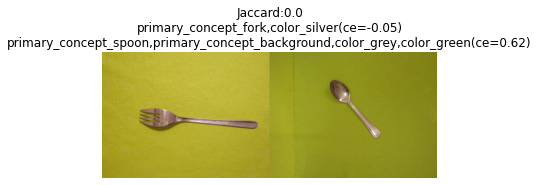

cds_obj_color inception_utensil_color_bias_TEA_SPOON.csv
------------------------------------
image pairs [269, 276]
jaccard 0.0
sum1 -0.04971128407884229
sum2 0.6212263715627516
------------------------------------
['primary_concept_fork' 'color_silver']
['primary_concept_spoon' 'primary_concept_background' 'color_grey'
 'color_green']
------------------------------------
inception_utensil_color_bias_TEA_SPOON.csv


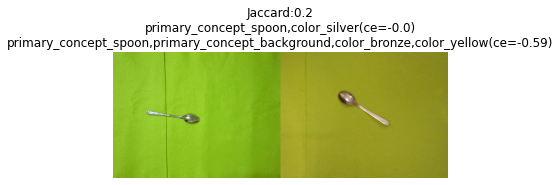

cds_obj_color inception_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [303, 368]
jaccard 0.2
sum1 -0.004967352248024706
sum2 -0.586677207572904
------------------------------------
['primary_concept_spoon' 'color_silver']
['primary_concept_spoon' 'primary_concept_background' 'color_bronze'
 'color_yellow']
------------------------------------
inception_utensil_color_bias_FISH_SLICE.csv


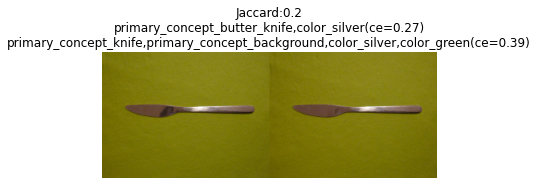

cds_obj_color inception_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [140, 237]
jaccard 0.2
sum1 0.2729681171408516
sum2 0.3861967271473158
------------------------------------
['primary_concept_butter_knife' 'color_silver']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------
inception_utensil_color_bias_DINNER_CUTLERY.csv


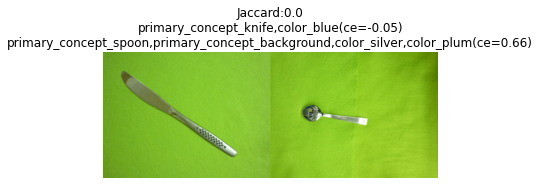

cds_obj_color squeezenet_utensil_both_bias_TEA_SPOON.csv
------------------------------------
image pairs [1989, 2005]
jaccard 0.0
sum1 -0.051229548993110996
sum2 0.6615986114212485
------------------------------------
['primary_concept_knife' 'color_blue']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
------------------------------------
squeezenet_utensil_both_bias_TEA_SPOON.csv


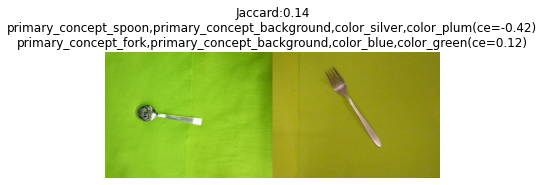

cds_obj_color squeezenet_utensil_both_bias_FISH_SLICE.csv
------------------------------------
image pairs [2005, 2029]
jaccard 0.14
sum1 -0.4228351957184262
sum2 0.12406713362103898
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
['primary_concept_fork' 'primary_concept_background' 'color_blue'
 'color_green']
------------------------------------
squeezenet_utensil_both_bias_FISH_SLICE.csv


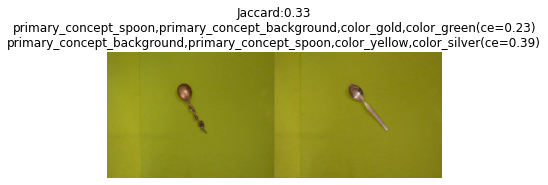

cds_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1933, 1974]
jaccard 0.33
sum1 0.228757696964034
sum2 0.3884036580983988
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_gold'
 'color_green']
['primary_concept_background' 'primary_concept_spoon' 'color_yellow'
 'color_silver']
------------------------------------


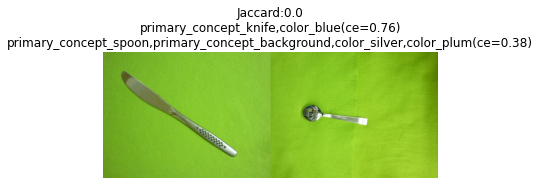

cds_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [1989, 2005]
jaccard 0.0
sum1 0.7636139062436278
sum2 0.38431384816506575
------------------------------------
['primary_concept_knife' 'color_blue']
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
------------------------------------


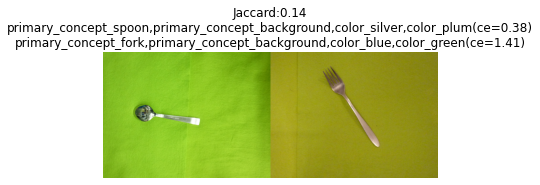

cds_obj_color squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2005, 2029]
jaccard 0.14
sum1 0.38431384816506575
sum2 1.4116042989418751
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_silver'
 'color_plum']
['primary_concept_fork' 'primary_concept_background' 'color_blue'
 'color_green']
------------------------------------
squeezenet_utensil_both_bias_DINNER_CUTLERY.csv
squeezenet_utensil_color_bias_TEA_SPOON.csv


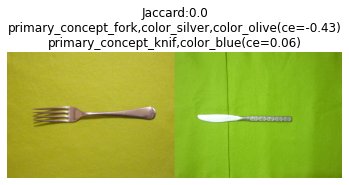

cds_obj_color squeezenet_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [2086, 2090]
jaccard 0.0
sum1 -0.43170176057155263
sum2 0.0633701734978832
------------------------------------
['primary_concept_fork' 'color_silver' 'color_olive']
['primary_concept_knif' 'color_blue']
------------------------------------


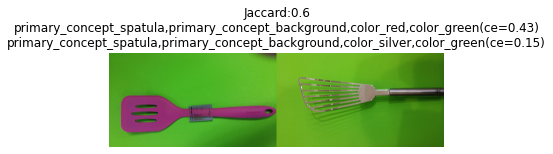

cds_obj_color squeezenet_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [2087, 2114]
jaccard 0.6
sum1 0.4305129788487481
sum2 0.14538503000290717
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_red'
 'color_green']
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_green']
------------------------------------


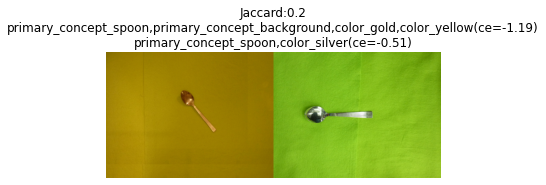

cds_obj_color squeezenet_utensil_color_bias_FISH_SLICE.csv
------------------------------------
image pairs [2124, 2309]
jaccard 0.2
sum1 -1.1908161374948505
sum2 -0.5073254626643787
------------------------------------
['primary_concept_spoon' 'primary_concept_background' 'color_gold'
 'color_yellow']
['primary_concept_spoon' 'color_silver']
------------------------------------
squeezenet_utensil_color_bias_FISH_SLICE.csv


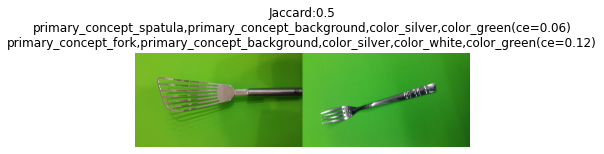

cds_obj_color squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2114, 2321]
jaccard 0.5
sum1 0.06147623390245507
sum2 0.11780224429645747
------------------------------------
['primary_concept_spatula' 'primary_concept_background' 'color_silver'
 'color_green']
['primary_concept_fork' 'primary_concept_background' 'color_silver'
 'color_white' 'color_green']
------------------------------------


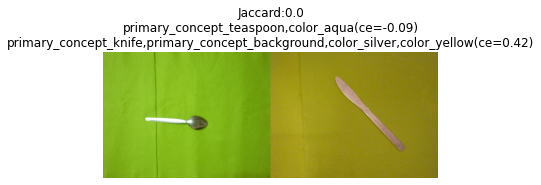

cds_obj_color squeezenet_utensil_color_bias_DINNER_CUTLERY.csv
------------------------------------
image pairs [2287, 2323]
jaccard 0.0
sum1 -0.092611369130082
sum2 0.41759079348744377
------------------------------------
['primary_concept_teaspoon' 'color_aqua']
['primary_concept_knife' 'primary_concept_background' 'color_silver'
 'color_yellow']
------------------------------------
squeezenet_utensil_color_bias_DINNER_CUTLERY.csv


In [42]:
for gt in graph_types:
#     Path("ch/"+gt).mkdir(parents=True, exist_ok=True)
    for modelname in modelnames:
        if 'imagenet' in modelname:
                path = './all_imagenet'
                classnames = imagenet_classes
        else:
            path = './all'
            classnames = utensil_classes
        sql = '''select id as id, imagename as name from apiservice_images where modelname = "{0}" and id in (select distinct imageid from apiservice_annotations)
            '''.format(modelname)
        sql_imgs = pd.read_sql(sql,conn)
        
        for classname in classnames:
            idlist = sql_imgs.id.values
            imlist = sql_imgs.name.values
            imagesList = os.listdir(path)
            final_imglist = list(set(imlist) & set(imagesList))
            features = []
            for image in final_imglist:
                img = PImage.open(os.path.join(path,image))
                data = data_transforms(img)
                data = data.reshape(data.shape[1],data.shape[2],3)
                img = rgb2hsv(data)
                features.append(img)
            arr = np.array(features)
            n, nx, ny, ch = arr.shape
            arr = arr.reshape(n, nx*ny*ch)
            iso = manifold.Isomap(n_neighbors=6, n_components=2)
            iso.fit(arr)
            manifold_2Da = iso.transform(arr)
            manifold_2D = pd.DataFrame(manifold_2Da, columns=['Component 1', 'Component 2'])
            distances = pdist(np.stack(manifold_2D.values), metric='cityblock')
            ind = np.argpartition(distances, 10)[:10]
            pairs = get_pairs(distances, ind)
            image_ids = []

            for p in pairs:
                image_ids.append(sql_imgs[sql_imgs.name.isin([final_imglist[p[0]],final_imglist[p[1]]])]['id'].values)

            abc = []
            for i in image_ids:
                k = []
                for j in i:
                    if j in idlist:
                        k.append(j)
                        # print(k)
                abc.append(k)
            result_arr = []
#             modelname = 'squeezenet_utensil_color_bias'
#             classname = 'DINNER_CUTLERY'
            filename = modelname+'_'+classname+'.csv'
            annotations = pd.read_csv('class_concepts_images/'+filename)
            effects = pd.read_csv(gt+'/effects/'+filename)
            for img_pairs in abc:
                if len(img_pairs) == 2:
                    ans = {}
#                     print("image pairsss", img_pairs)
                    concepts1 = 'primary_concept_'+annotations[annotations.id == img_pairs[0]]['primary_concept'].unique()
                    cols1 = 'color_'+annotations[annotations.id == img_pairs[0]]['colors'].unique()
                    all_concepts1 = np.hstack((concepts1,cols1))
#                     print("pairs11111-------", all_concepts1)
                    concepts2 = 'primary_concept_'+annotations[annotations.id == img_pairs[1]]['primary_concept'].unique()
                    cols2 = 'color_'+annotations[annotations.id == img_pairs[1]]['colors'].unique()
                    all_concepts2 = np.hstack((concepts2,cols2))
#                     print("pair22222----------",all_concepts2)
                    sum1 = effects[effects.treatment.isin(all_concepts1)]['score'].sum()
                    sum2 = effects[effects.treatment.isin(all_concepts2)]['score'].sum()
            #         print(sum1, sum2, abs(sum1-sum2))
                    ans['modelname'] = modelname
                    ans['classname'] = classname
                    ans['sum1'] = sum1
                    ans['sum2'] = sum2
                    ans['diff'] = abs(sum1-sum2)
                    ans['jaccard'] = jaccard_similarity(all_concepts1,all_concepts2)
                    result_arr.append(ans)
                    prints = np.random.randint(0, 30)
                    if prints in range(15,20) and 'imagenet' not in modelname:
                        
                        displayimgs = sql_imgs[sql_imgs.id.isin(img_pairs)]['name'].values
                        im1 = Image.open('all/'+displayimgs[0])
                        im2 = Image.open('all/'+displayimgs[1])
                        sm1 = round(ans['sum1'],2)
                        sm2 = round(ans['sum2'],2)
                        cn1 = ','.join(all_concepts1)
                        cn2 = ','.join(all_concepts2)
                        
                        try:
                            
 
                            plt.imshow(np.hstack((np.array(im1),np.array(im2))))
                            plt.title('Jaccard:'+str(ans['jaccard'])+'\n'+cn1+'(ce='+str(sm1)+')\n'+str(cn2)+'(ce='+str(sm2)+')')
                            plt.axis('off')
                            plt.savefig('same_pairs/'+str(img_pairs[0])+'_'+str(img_pairs[1])+'.png')
                            plt.show()
                            plt.close()
                            print(gt, filename)
                            print("------------------------------------")
                            print("image pairs", img_pairs)
                            print('jaccard',ans['jaccard'])
                            print('sum1',ans['sum1'])
                            print('sum2',ans['sum2'])
    #                         Image.fromarray(np.hstack((np.array(im1),np.array(im2)))).show()
                            print("------------------------------------")
                            print(all_concepts1)
                            print(all_concepts2)
                            print("------------------------------------")

                        except:
                            continue
                       
                        
                        
#             df = pd.DataFrame(result_arr)
#             df.to_csv('ch/'+gt+'/'+filename+'.csv')
            print(filename)
#             break